In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from graspy.utils import import_graph, symmetrize, pass_to_ranks
from graspy.simulations import er_np, zi_np, weighted_sbm
from graspy.embed import OmnibusEmbed

from sklearn.utils.extmath import randomized_svd

import numpy as np
%matplotlib inline

In [5]:
# Global plotting settings
CBAR_KWS = dict(shrink=0.7)

In [3]:
n_communities = [50, 50]
P = np.array([[0.8, 0.2], [0.2, 0.8]])
Wt = np.random.poisson
Wtargs = dict(lam=3)
A_poisson= weighted_sbm(n_communities, P, Wt=Wt, Wtargs=Wtargs)

Wt = np.random.normal
Wtargs = dict(loc=0, scale=1)
A_normal = weighted_sbm(n_communities, P, Wt=Wt, Wtargs=Wtargs)

In [4]:
def plot_heatmap(X,
                 transform=None,
                 figsize=(10, 10),
                 title=None,
                 context='talk',
                 font_scale=1,
                 xticklabels=False,
                 yticklabels=False,
                 cmap='Reds',
                 center=None,
                 cbar=True):
    """
    Parameters
    ----------
    X : nx.Graph or np.ndarray object
        Graph or numpy matrix to graph
    transform : None, or one of {log, pass_to_ranks}
    figsize : tuple of integers, optional, default: (10, 10)
        Width, height in inches.
    title : str, optional, default: None
        Title of plot.
    context :  None, or one of {paper, notebook, talk (default), poster}
        The name of a preconfigured set.
    font_scale : float, optional, default: 1
        Separate scaling factor to independently scale the size of the font elements.
    xticklabels, yticklabels : bool or list, optional
        If True, plot the column names of the dataframe. If False, don’t plot the 
        column names. If list-like, plot these alternate labels as the xticklabels.
        If an integer, use the column names but plot only every n label. 
    cmap : str
        Valid color map.
    center : float, optional, default: None
        The value at which to center the colormap when plotting divergant data.
    cbar : bool, default: True
        Whether to draw a colorbar.
    """
    arr = import_graph(X).copy()

    # TODO: Some bug here with taking logs
    if transform == 'log':
        arr[arr > 0] = np.log(arr[arr > 0])
        #arr = np.log(arr, where=(arr > 0))
    elif transform == 'pass_to_ranks':
        arr = pass_to_ranks(arr)

    with sns.plotting_context(context, font_scale=1):
        fig = plt.figure(figsize=figsize)
        plot = sns.heatmap(
            arr,
            cmap=cmap,
            square=True,
            xticklabels=xticklabels,
            yticklabels=yticklabels,
            cbar_kws=CBAR_KWS,
            center=center,
            cbar=cbar)
        if title is not None:
            plot.set_title(title)
        fig.tight_layout()

    return fig


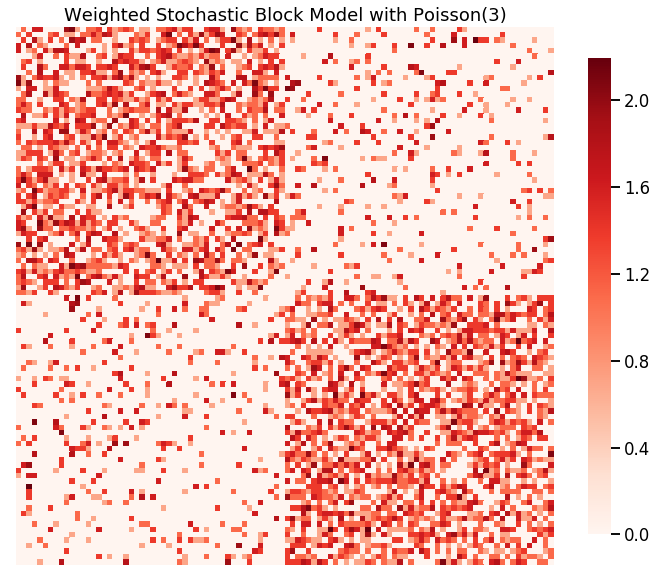

In [5]:
title = 'Weighted Stochastic Block Model with Poisson(3)'

fig= plot_heatmap(A_poisson, title=title, transform='log')

In [7]:
g = np.load('../desikan_hnu1_dwi/sub-0025427_ses-1_dwi_desikan.npy')

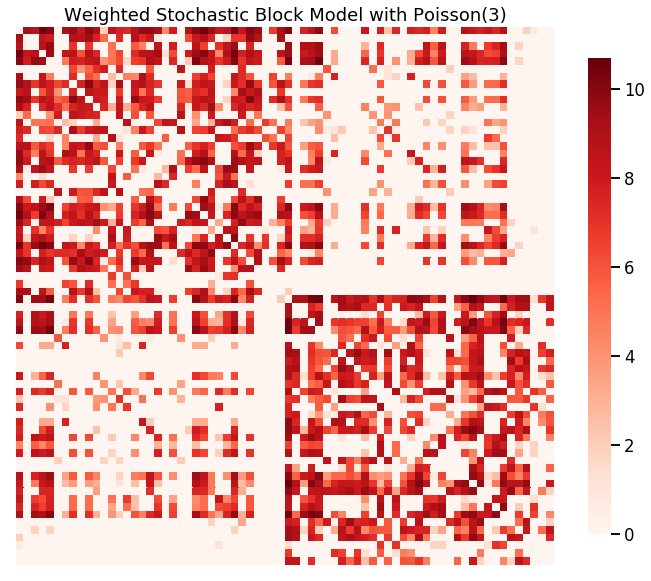

In [9]:
fig= plot_heatmap(g, transform='log', title=title)

In [100]:
def plot_grid_plot(X,
                   figsize=(10, 10),
                   title=None,
                   font_scale=1,
                   xticklabels=False,
                   yticklabels=False,
                   cmap='hot',
                   context='talk'):
    """
    Parameters
    ----------
    X : nx.Graph or np.ndarray object
        Graph or numpy matrix to graph
    context :  None, or one of {paper, notebook, talk (default), poster}
    title : str
    font_scale : int (default=1)
    xticklabels, yticklabels : bool or list, optional
    cmap : str
        Valid color map
    """
    arr = import_graph(X)

    with sns.plotting_context(context, font_scale=1):
        fig = plt.figure(figsize=figsize)
        plot = sns.heatmap(
            arr,
            cmap=cmap,
            square=True,
            xticklabels=xticklabels,
            yticklabels=yticklabels,
            cbar_kws=CBAR_KWS)
        if title is not None:
            plot.set_title(title)
        fig.tight_layout()

    return fig

In [21]:
n_communities = [50, 50]
P = np.array([[0.3, 0.1], [0.1, 0.3]])
Wt = np.random.poisson
Wtargs = dict(lam=2)
A_poisson= weighted_sbm(n_communities, P, Wt=Wt, Wtargs=Wtargs)

Wt = np.random.poisson
Wtargs = dict(lam=10)
A_poisson2 = weighted_sbm(n_communities, P, Wt=Wt, Wtargs=Wtargs)

In [26]:
def plot_grid_plot(X,
                   labels,
                   transform=None,
                   height=10,
                   title=None,
                   context='talk',
                   font_scale=1,
                   xticklabels=False,
                   yticklabels=False):
    """
    Parameters
    ----------
    X : list of nx.Graph or np.ndarray object
        List of nx.Graph or numpy arrays to plot
    transform : None, or one of {log, pass_to_ranks}
    height : integers, optional, default: 10
        Height of figure in inches.
    title : str, optional, default: None
        Title of plot.
    context :  None, or one of {paper, notebook, talk (default), poster}
        The name of a preconfigured set.
    font_scale : float, optional, default: 1
        Separate scaling factor to independently scale the size of the font elements.
    xticklabels, yticklabels : bool or list, optional
        If True, plot the column names of the dataframe. If False, don’t plot the 
        column names. If list-like, plot these alternate labels as the xticklabels.
        If an integer, use the column names but plot only every n label. 
    """

    if isinstance(X, list):
        graphs = [import_graph(x) for x in X]
    else:
        graphs = [import_graph(X)]

    # TODO: add transforms

    palette = sns.color_palette('Set1', desat=0.75, n_colors=len(labels))

    dfs = []
    for idx, graph in enumerate(graphs):
        cdx, rdx = np.where(graph > 0)
        weights = graph[(cdx, rdx)]
        df = pd.DataFrame(
            np.vstack([cdx[::-1], rdx, weights]).T,
            columns=['cdx', 'rdx', 'weights'])
        df['labels'] = [labels[idx]] * len(cdx)
        dfs.append(df)

    df = pd.concat(dfs, axis=0)

    with sns.plotting_context(context, font_scale=font_scale):
        plot = sns.relplot(
            data=df,
            x='cdx',
            y='rdx',
            hue='labels',
            size='weights',
            sizes=(10, 200),
            alpha=0.7,
            palette=palette,
            height=height)
        plot.ax.axis('off')
        if title is not None:
            plot.set(title=title)

    return plot

In [27]:
n_communities = [50, 50]
P = np.array([[0.25, 0.05], [0.05, 0.25]])
Wt = np.random.randint
Wtargs = dict(low=1, high=10)
A_unif1= weighted_sbm(n_communities, P, Wt=Wt, Wtargs=Wtargs)

Wtargs = dict(low=2, high=5)
A_unif2= weighted_sbm(n_communities, P, Wt=Wt, Wtargs=Wtargs)

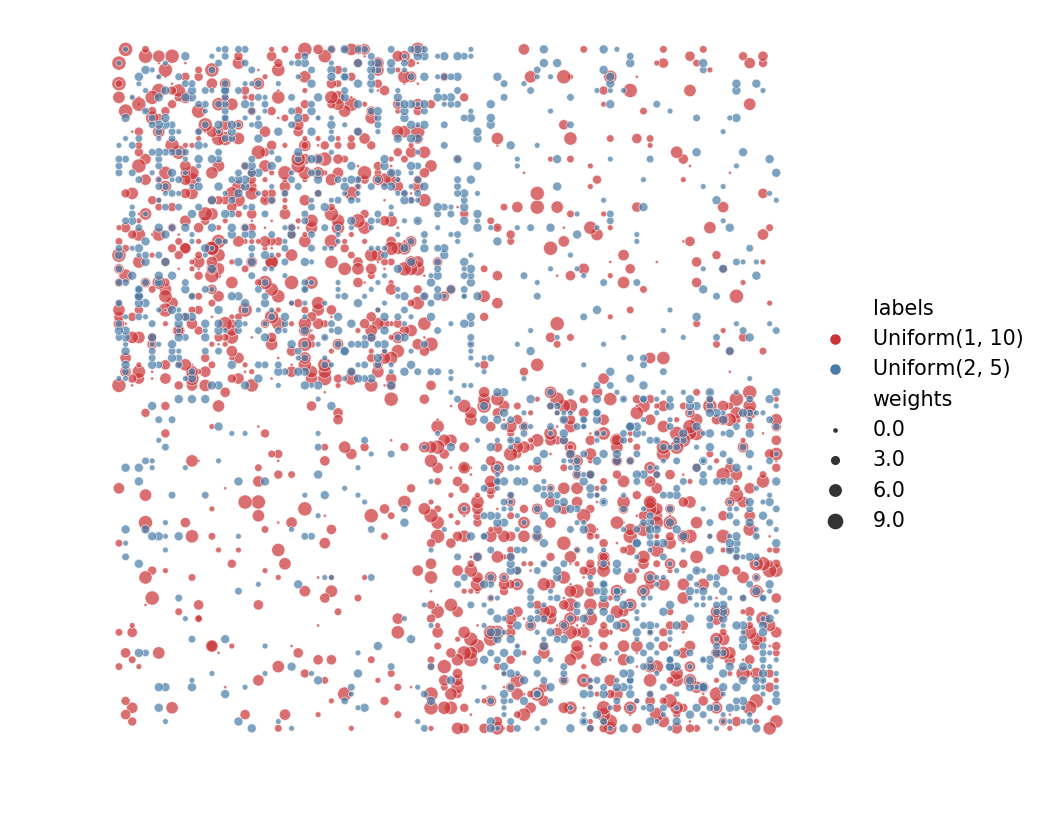

In [28]:
f = plot_grid_plot(X=[A_unif1, A_unif2], labels=["Uniform(1, 10)", "Uniform(2, 5)"], 
                   title='Two Weighted Stochastic Block Models', height=12, font_scale=1.25)

In [21]:
f.ax.legend(title='asdf')

In [25]:
f.ax